In [1]:
import numpy as np

import pathlib

from matplotlib import pylab as pl

%load_ext autoreload
%autoreload 2

import plancklens

from plancklens import utils as putils

import os
from os.path import join as opj

import healpy as hp

In [14]:
from itfgs.params import fastSOGaussianOnly as SO_

In [15]:
cls_len = SO_.cls_len
cls_unl = SO_.cls_unl
cls_grad = SO_.cls_grad
tt = cls_len['tt']
pp = cls_unl['pp']

In [17]:
class Config(object):
    def __init__(self, cls_unl, cls_len, cls_weight, nlev_t = 7., beam = 1.7, lmax_qlm = 4000, lminrec = 100, lmaxrec = 3500):

        self.nlev_t = nlev_t
        self.nlev_p = np.sqrt(2)*self.nlev_t
        self.beam = beam

        self.lmin_tlm = lminrec
        self.lmax_ivf = lmaxrec

        self.lmax_qlm = lmax_qlm

        self.cls_unl = cls_unl
        self.cls_len = cls_len
        self.cls_weight = cls_weight


SO = Config(cls_unl, cls_len, cls_grad, SO_.nlev_t, SO_.beam, SO_.lmax_qlm, SO_.lmax_ivf, SO_.lmin_tlm)
qe_key = 'ptt'
nlev_t = SO.nlev_t
nlev_p = SO.nlev_p
beam_fwhm = SO.beam
cls_unl_fid = SO.cls_unl
lmin_cmb, lmax_cmb = SO.lmin_tlm, SO.lmax_ivf
lmax_qlm = SO.lmax_qlm

In [18]:
cls_len = SO_.cls_len
cls_unl = SO_.cls_unl
cls_grad = SO_.cls_grad
tt = cls_len['tt']
pp = cls_unl['pp']

In [128]:
version = ''
version = 'sharp200'
numsim = 0

In [129]:
from lenscarf.iterators import statics

from plancklens.qcinv.util_alm import alm_copy as palm_copy


plms_QE = np.load(f'{SO_.TEMP}/ptt_sim{numsim:04}{version}/normalized_phi_plm_it000.npy')

p2k = np.arange(4001) * np.arange(1, 4002) * 0.5

In [130]:
input_map = hp.read_alm(SO_.SIMDIR+f'/sim_{numsim:04}_plm.fits')

In [131]:
plm_in = palm_copy(input_map, lmax = SO_.lmax_qlm)
auto_in = hp.alm2cl(plm_in) 

In [132]:
cross_qe = hp.alm2cl(plm_in, plms_QE) 

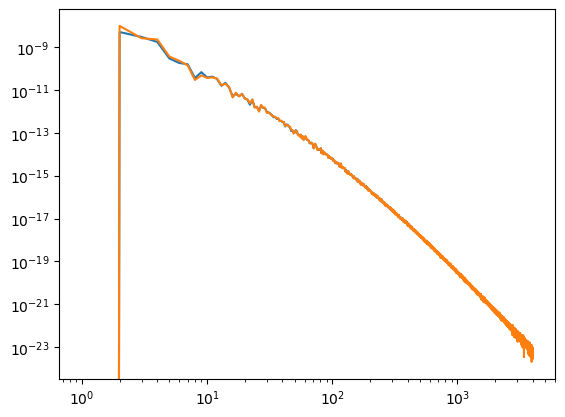

In [133]:
pl.loglog(auto_in)
pl.loglog(cross_qe)

/tmp/ipykernel_101484/591528878.py:1: RuntimeWarning: invalid value encountered in divide
  pl.loglog(auto_in/cross_qe)


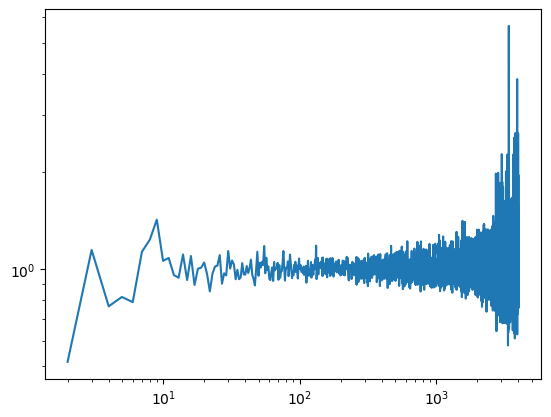

In [134]:
pl.loglog(auto_in/cross_qe)

In [135]:
iters = [0, 1]

In [136]:
plms = statics.rec.load_plms(f'{SO_.TEMP}/ptt_sim{numsim:04}{version}/', iters)

In [137]:
cs_ = [hp.alm2cl(plm_, plm_in) for plm_ in plms]

In [138]:
as_ = [hp.alm2cl(plm_) for plm_ in plms]

In [139]:
rhos_list = [c_/np.sqrt(a_*auto_in) for c_, a_ in zip(cs_, as_)]

/tmp/ipykernel_101484/3066182460.py:1: RuntimeWarning: invalid value encountered in divide
  rhos_list = [c_/np.sqrt(a_*auto_in) for c_, a_ in zip(cs_, as_)]


Text(0.5, 0, 'L')

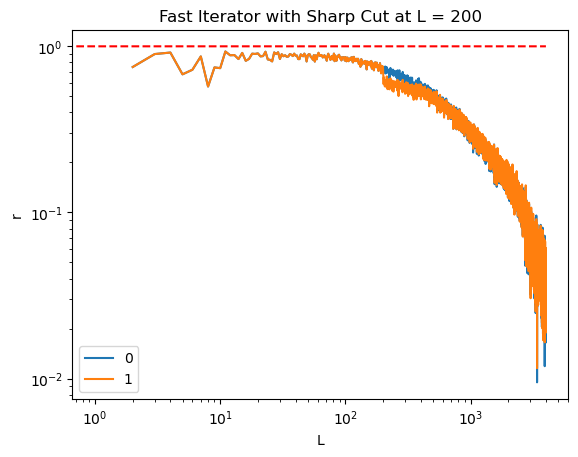

In [141]:
pl.title('Fast Iterator with Sharp Cut at L = 200')
for i, rho in enumerate(rhos_list):
    pl.loglog(rho, label = i)
pl.loglog(np.arange(0, 4000), np.ones(4000), 'r--')
pl.legend()
pl.ylabel('r')
pl.xlabel('L')


Text(0.5, 0, 'L')

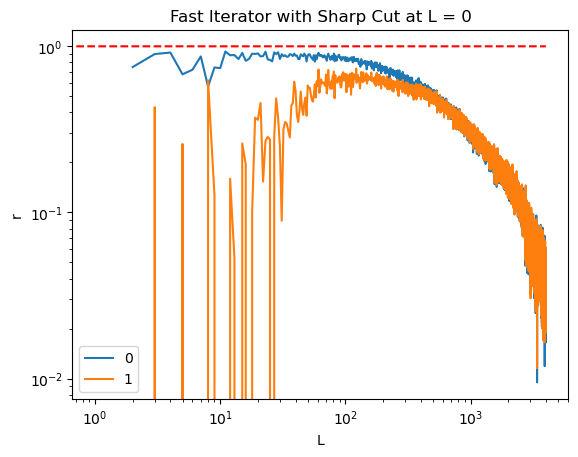

In [127]:
pl.title('Fast Iterator with Sharp Cut at L = 0')
for i, rho in enumerate(rhos_list):
    pl.loglog(rho, label = i)
pl.loglog(np.arange(0, 4000), np.ones(4000), 'r--')
pl.legend()
pl.ylabel('r')
pl.xlabel('L')
